# SVM with PCA
Experiments with PCA used together with a SVM model.

First some imports.

In [2]:
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Accuracy: 91.76%



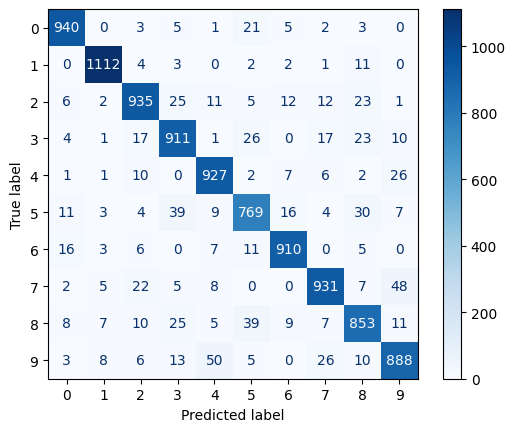

In [46]:
data = idx2numpy.convert_from_file('mnist_data/train_file_image').reshape(60000, 784)
targets = idx2numpy.convert_from_file('mnist_data/train_file_label')
test = idx2numpy.convert_from_file('mnist_data/test_file_image').reshape(10000, 784)
testtargets = idx2numpy.convert_from_file('mnist_data/test_file_label')

def pca_whiten(X, y, test_X, test_y, n_components=2):
    pca = PCA(n_components=n_components, whiten=True)
    model = OneVsOneClassifier(svm.SVC(kernel="linear", random_state=1), n_jobs=-1)
    pipeline = Pipeline([('scaler', StandardScaler()), ("pca", pca), ("svm", model)])
    pipeline.fit(X, y)
    yhat = pipeline.predict(test_X)
    acc = accuracy_score(testtargets, yhat)
    print('Accuracy: {:2.2%}\n'.format(acc))
    return confusion_matrix(test_y, yhat)

def scale_pca_svm_pipeline(data, targets, test, testtargets):
    pca = PCA(n_components=28)
    svm_model = OneVsOneClassifier(svm.SVC(kernel='linear', random_state=1, gamma='auto' ), n_jobs=-1)
    pipeline = Pipeline([('scaler', StandardScaler()), ('pca', pca), ('svm', svm_model)])
    pipeline.fit(data, targets)
    predictions = pipeline.predict(test)
    acc = accuracy_score(testtargets, predictions)
    print('Accuracy: {:2.2%}\n'.format(acc))
    return confusion_matrix(testtargets, predictions)

size = 60000
ConfusionMatrixDisplay(pca_whiten(data[:size], targets[:size], test, testtargets, 28)).plot(cmap=plt.cm.Blues)

Accuracy: 91.92%



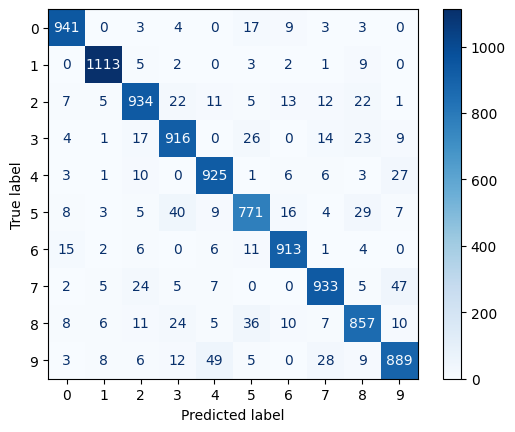

In [45]:
ConfusionMatrixDisplay(scale_pca_svm_pipeline(data[:size], targets[:size], test, testtargets)).plot(cmap=plt.cm.Blues)

## Helper functions
The functions from kslearn are great, but to make the rest of the code more readable we define our own helper functions.

In [2]:
def load_mnist():
    data = idx2numpy.convert_from_file('mnist_data/train_file_image').reshape(60000, 784)

# create a pipeline for PCA and SVM, fit the model and create a confusion matrix
def pca_svm_pipeline(data, targets, test, testtargets):
    pca = PCA(n_components=2)
    svm_model = svm.SVC(kernel='linear')
    pipeline = Pipeline([('pca', pca), ('svm', svm_model)])
    pipeline.fit(data, targets)
    predictions = pipeline.predict(test)
    return confusion_matrix(testtargets, predictions)

data = idx2numpy.convert_from_file('mnist_data/train_file_image').reshape(60000, 784)
targets = idx2numpy.convert_from_file('mnist_data/train_file_label')
test = idx2numpy.convert_from_file('mnist_data/test_file_image').reshape(10000, 784)
testtargets = idx2numpy.convert_from_file('mnist_data/test_file_label')

ConfusionMatrixDisplay(pca_svm_pipeline(data, targets, test, testtargets)).plot()

In [37]:
def svm_pipeline(data, targets, test, testtargets):
    # svm_model = svm.SVC(kernel='linear')
    svm_model = OneVsOneClassifier(svm.SVC(kernel='linear'), n_jobs=-1)
    pipeline = Pipeline([('scaler', StandardScaler()), ('svm', svm_model)])
    pipeline.fit(data, targets)
    predictions = pipeline.predict(test)
    acc = accuracy_score(testtargets, predictions)
    print('Accuracy: {:2.2%}\n'.format(acc))
    return confusion_matrix(testtargets, predictions)


def pca_svm_pipeline(data, targets, test, testtargets):
    pca = PCA(n_components=20)
    svm_model = svm.SVC(kernel='linear')
    pipeline = Pipeline([('pca', pca), ('svm', svm_model)])
    pipeline.fit(data, targets)
    predictions = pipeline.predict(test)
    acc = accuracy_score(testtargets, predictions)
    print('Accuracy: {:2.2%}\n'.format(acc))
    return confusion_matrix(testtargets, predictions)

def scale_pca_svm_pipeline(data, targets, test, testtargets):
    pca = PCA(n_components=28)
    svm_model = OneVsOneClassifier(svm.SVC(kernel='linear', random_state=1), n_jobs=-1)
    pipeline = Pipeline([('scaler', StandardScaler()), ('pca', pca), ('svm', svm_model)])
    pipeline.fit(data, targets)
    predictions = pipeline.predict(test)
    acc = accuracy_score(testtargets, predictions)
    print('Accuracy: {:2.2%}\n'.format(acc))
    return confusion_matrix(testtargets, predictions)

data = idx2numpy.convert_from_file('mnist_data/train_file_image').reshape(60000, 784)
targets = idx2numpy.convert_from_file('mnist_data/train_file_label')
test = idx2numpy.convert_from_file('mnist_data/test_file_image').reshape(10000, 784)
testtargets = idx2numpy.convert_from_file('mnist_data/test_file_label')
size = 10000

def plot_svm_accuracy(data, targets, test, testtargets, size):
    accuracies = []
    components = []
    for i in range(2, 50):
        pca = PCA(n_components=i)
        svm_model = OneVsOneClassifier(svm.SVC(kernel='linear', random_state=1), n_jobs=-1)
        pipeline = Pipeline([('scaler', StandardScaler()), ('pca', pca), ('svm', svm_model)])
        # pipeline = Pipeline([('pca', pca), ('svm', svm_model)])
        pipeline.fit(data[:size], targets[:size])
        predictions = pipeline.predict(test)
        acc = accuracy_score(testtargets, predictions)
        accuracies.append(acc)
        components.append(i)
    plt.figure()
    plt.scatter(components, accuracies)
    plt.title('Support Vector Machine accuracy as a function of number of Principal Components\ntraining size: {}'.format(size))
    plt.xlabel('Principal Components')
    plt.ylabel('Accuracy')

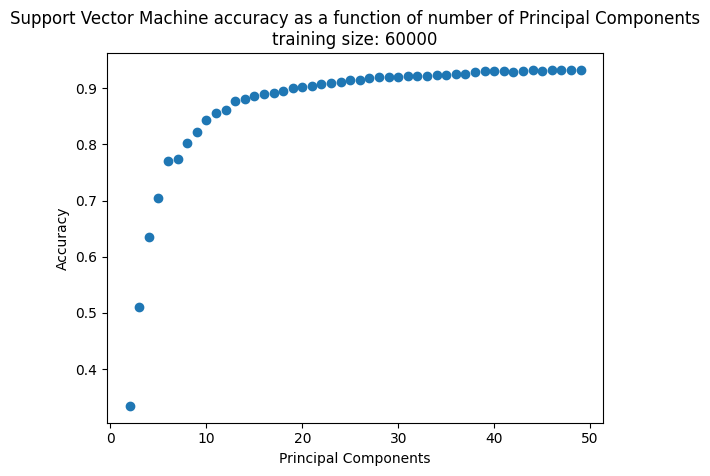

In [19]:
plot_svm_accuracy(data, targets, test, testtargets, 60000)

Accuracy: 91.46%



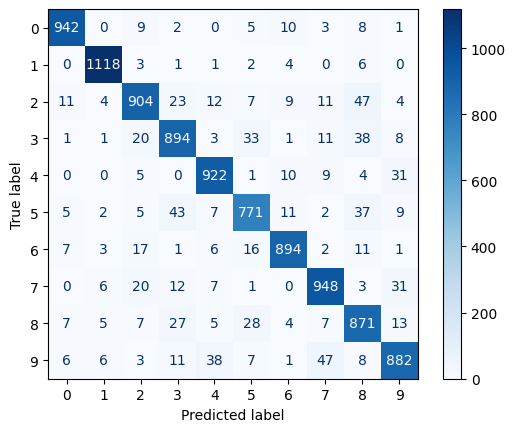

In [38]:
ConfusionMatrixDisplay(svm_pipeline(data[:size], targets[:size], test, testtargets)).plot(cmap=plt.cm.Blues)

In [ ]:
ConfusionMatrixDisplay(pca_svm_pipeline(data[:size], targets[:size], test, testtargets)).plot()


Accuracy: 90.62%



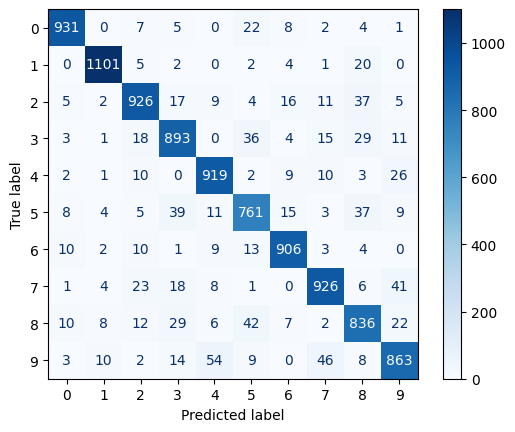

In [39]:
ConfusionMatrixDisplay(scale_pca_svm_pipeline(data[:size], targets[:size], test, testtargets)).plot(cmap=plt.cm.Blues)

In [ ]:
datafile = 'mnist_data/train_file_image'

targetfile = 'mnist_data/train_file_label'
data = idx2numpy.convert_from_file(datafile).reshape(60000, 784)
targets = idx2numpy.convert_from_file(targetfile)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# data = StandardScaler().fit_transform(data)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plot_components(data_pca[100:200], targets[100:200])

plt.figure()
plt.scatter(data_pca[100:200, 0], data_pca[100:200, 1], c=targets[100:200], cmap="tab10")
plt.colorbar()
plt.show()


print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_[:2])
)

In [ ]:
import matplotlib.pyplot as plt
import idx2numpy
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

file = 'mnist_data/train_file_image'
targetfile = 'mnist_data/train_file_label'
imagearray = idx2numpy.convert_from_file(file)

targets = idx2numpy.convert_from_file(targetfile)
print(imagearray.shape)
print(targets.shape)

plt.imshow(imagearray[0], cmap=plt.cm.binary)
from sklearn.decomposition import PCA
pca = PCA(n_components=28, svd_solver="randomized")

for n in range(10):
    plt.imshow(imagearray[n], cmap=plt.cm.cividis_r)
    plt.show()
    pca_image = pca.fit(imagearray[n]).transform(imagearray[n])
    plt.imshow(pca_image, cmap=plt.cm.cividis_r)
    plt.show()

In [ ]:
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

datafile = 'mnist_data/train_file_image'
targetfile = 'mnist_data/train_file_label'
data = idx2numpy.convert_from_file(datafile).reshape(60000, 784)
targets = idx2numpy.convert_from_file(targetfile)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

pca = PCA(n_components=2)
data = StandardScaler().fit_transform(data)
data_pca = pca.fit_transform(data)

plt.figure()
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=targets, cmap=plt.cm.tab10)
plt.colorbar()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import idx2numpy
import numpy as np

n_components = 4 * 10

def plot_gallery(title, images, n_col=4, n_row=10, cmap=plt.cm.binary):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape((28,28)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])


file = 'mnist_data/train_file_image'
imagearray = idx2numpy.convert_from_file(file)

n_samples, _, _ = imagearray.shape
images_centered = imagearray - imagearray.mean(axis=0)
images_centered -= images_centered.mean(axis=1).reshape(n_samples, 28, -1)


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


plot_components(data_pca[:500], targets[:500])

pca = PCA(n_components=28*28, svd_solver="randomized", whiten=True)
pca.fit(images_centered.reshape(60000, 28 * 28))
plot_gallery("Numbers from MNIST", images_centered[:n_components])

plot_gallery("Numbers after PCA", pca.components_[:n_components])

In [ ]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

## Fully assembled example
This section covers a fully assembled machine learning pipeline, generating data for the project report. There are a few decision that could change, such as the output style, report contents and coloring, but for now this is a complete example.

Accuracy: 82.41%



/tmp/ipykernel_1920/1607496121.py:56: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose().to_latex("results/classification_report.tex")


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       980
           1       0.85      0.96      0.90      1135
           2       0.80      0.73      0.76      1032
           3       0.84      0.78      0.81      1010
           4       0.82      0.85      0.83       982
           5       0.74      0.76      0.75       892
           6       0.91      0.80      0.85       958
           7       0.85      0.85      0.85      1028
           8       0.81      0.74      0.77       974
           9       0.74      0.82      0.78      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



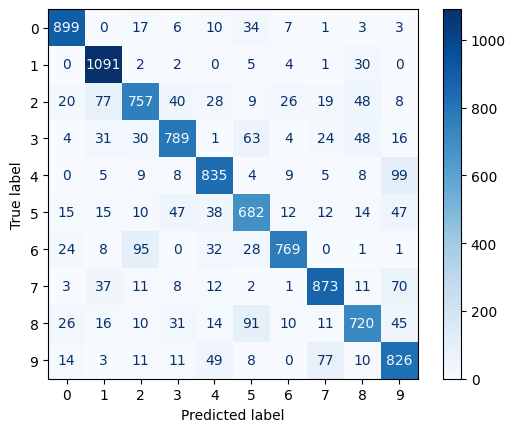

In [53]:
import idx2numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

X = idx2numpy.convert_from_file('mnist_data/train_file_image').reshape(60000, 784)
y = idx2numpy.convert_from_file('mnist_data/train_file_label')
X_test = idx2numpy.convert_from_file('mnist_data/test_file_image').reshape(10000, 784)
y_test = idx2numpy.convert_from_file('mnist_data/test_file_label')


pca_model_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(svd_solver="full")),
    ("classifier", OneVsOneClassifier(SVC(kernel="linear", random_state=42)))]
)

hyperparameters = {
    "pca__n_components": [2, 50, 100, 0.95],
    "pca__whiten": [True, False],
    "classifier__estimator__C": [0.01, 0.1, 1, 10],
    "classifier__estimator__gamma": [1, 0.1, 0.01, 0.001, 0.0001],
}

search = GridSearchCV(pca_model_pipeline,
                      hyperparameters,
                      cv=5,
                      scoring="f1_macro", 
                      n_jobs=-1)

search.fit(X[:400], y[:400])

results = pd.DataFrame(search.cv_results_).sort_values("rank_test_score")

final_pipeline = search.best_estimator_.fit(X[:400], y[:400])
y_pred = final_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:2.2%}\n'.format(acc))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.Blues)
plt.savefig('results/confusion_matrix.png')

pd.DataFrame(search.cv_results_).to_csv("results/test.csv")
results.head(10)

from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose().to_latex("results/classification_report.tex")
print(classification_report(y_test, y_pred))